# 🏦 Bài toán phân tích trạng thái khoản vay của khách hàng

> Khi khách hàng tới đăng ký khoản vay, công ty sẽ ra 2 quyết định sau:
> 1. `Loan accepted`: Nếu khoản vay được chấp thuận, sẽ có 3 khả năng xảy ra:
    - `Fully paid`: Người vay trả hết nợ.
    - `Current`: Người vay đang trong kỳ hạn trả nợ.
    - `Charged-off`: Người vay không trả nợ đúng kỳ hạn trong thời gian dài.
> 2. `Loan rejected`: Khoản vay bị từ chối

# 🎯 Mục tiêu dự án
> Giong nhu hau het cac cong ty cho vay, "defaulted" la nhung nguoi gay ra thiet hai tai chinh lon nhat. Neu co the xac dinh nhung nguoi vay nay, ta co the giam bot rui ro tin dung, tranh thiet hai ve tai chinh. Thong qua EDA, Machine learning, ta co the phan tich xac suat mot khach hang "defaulted" la cao hay thap.


# 💾 Mô tả về dữ liệu
Các cột dữ liệu trongdataset

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>Khoản vay</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>Số kỳ hạn trả nợ (dao động từ 36 - 60 tháng).</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Lãi suất khoản vay</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>Tiền trả lãi hàng kỳ.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>Chấm điểm tín dụng</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>Chấm điểm tín dụng chi tiết</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>Chức danh của người vay.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Thời gian làm việc.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>Tình trạng nhà ở: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>Thu nhập tự khai của người vay.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Thể hiện khoản vay đã được xác nhận hay chưa</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>Tháng mà khoản vay được giải ngân</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Tình trạng hiện tại của khoản vay</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>Mục đích vay.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>Lý do vay</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>3 số đầu của zip code của người vay.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>Địa chỉ của người vay</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>Tỷ lệ khoản phải trả hàng tháng.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>Tháng mà thẻ tín dụng đầu tiên của người vay được mở</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>Số thẻ tín dụng đang hoạt động của người vay.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Số hồ sơ xấu</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Tổng tín dụng tuần hoàn</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Tỷ lệ tín dụng tuần hoàn.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>Tổng số thẻ tín dụng hiện tại của người vay</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>Trạng thái chờ của khoản vay</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Khoản vay cá nhân hay cùng được vay bởi nhiều người</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Số khoản vay được thực hiện để mua tài sản hoặc đất đai.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Số lần phá sản được ghi nhận</td>
    </tr>
  </tbody>
</table>

---
----

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import hvplot.pandas

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, classification_report, accuracy_score, confusion_matrix, roc_auc_score

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [2]:
data = pd.read_csv("lending_club_loan_two.csv")
data.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0   10000.00   36 months     11.44       329.48     B        B4   
1    8000.00   36 months     11.99       265.68     B        B5   
2   15600.00   36 months     10.49       506.97     B        B3   
3    7200.00   36 months      6.49       220.65     A        A2   
4   24375.00   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  \
0                Marketing  10+ years           RENT   117000.00   
1          Credit analyst     4 years       MORTGAGE    65000.00   
2             Statistician   < 1 year           RENT    43057.00   
3          Client Advocate    6 years           RENT    54000.00   
4  Destiny Management Inc.    9 years       MORTGAGE    55000.00   

  verification_status   issue_d  loan_status             purpose  \
0        Not Verified  Jan-2015   Fully Paid            vacation   
1        Not Verified  Jan-2015   Fully Paid  debt_consolidation   
2     Source Verified  Jan-2015   Fully Paid         credit_card   
3        Not Verified  Nov-2014   Fully Paid         credit_card   
4            Verified  Apr-2013  Charged Off         credit_card   

                     title   dti earliest_cr_line  open_acc  pub_rec  \
0                 Vacation 26.24         Jun-1990     16.00     0.00   
1       Debt consolidation 22.05         Jul-2004     17.00     0.00   
2  Credit card refinancing 12.79         Aug-2007     13.00     0.00   
3  Credit card refinancing  2.60         Sep-2006      6.00     0.00   
4    Credit Card Refinance 33.95         Mar-1999     13.00     0.00   

   revol_bal  revol_util  total_acc initial_list_status application_type  \
0   36369.00       41.80      25.00                   w       INDIVIDUAL   
1   20131.00       53.30      27.00                   f       INDIVIDUAL   
2   11987.00       92.20      26.00                   f       INDIVIDUAL   
3    5472.00       21.50      13.00                   f       INDIVIDUAL   
4   24584.00       69.80      43.00                   f       INDIVIDUAL   

   mort_acc  pub_rec_bankruptcies  \
0      0.00                  0.00   
1      3.00                  0.00   
2      0.00                  0.00   
3      0.00                  0.00   
4      1.00                  0.00   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650

In [3]:
data.describe()

loan_amnt  int_rate  installment  annual_inc       dti  open_acc  \
count  396030.00 396030.00    396030.00   396030.00 396030.00 396030.00   
mean    14113.89     13.64       431.85    74203.18     17.38     11.31   
std      8357.44      4.47       250.73    61637.62     18.02      5.14   
min       500.00      5.32        16.08        0.00      0.00      0.00   
25%      8000.00     10.49       250.33    45000.00     11.28      8.00   
50%     12000.00     13.33       375.43    64000.00     16.91     10.00   
75%     20000.00     16.49       567.30    90000.00     22.98     14.00   
max     40000.00     30.99      1533.81  8706582.00   9999.00     90.00   

        pub_rec  revol_bal  revol_util  total_acc  mort_acc  \
count 396030.00  396030.00   395754.00  396030.00 358235.00   
mean       0.18   15844.54       53.79      25.41      1.81   
std        0.53   20591.84       24.45      11.89      2.15   
min        0.00       0.00        0.00       2.00      0.00   
25%        0.00    6025.00       35.80      17.00      0.00   
50%        0.00   11181.00       54.80      24.00      1.00   
75%        0.00   19620.00       72.90      32.00      3.00   
max       86.00 1743266.00      892.30     151.00     34.00   

       pub_rec_bankruptcies  
count             395495.00  
mean                   0.12  
std                    0.36  
min                    0.00  
25%                    0.00  
50%                    0.00  
75%                    0.00  
max                    8.00

# 🔍 Exploratory Data Analysis

> **Mục đích:** 
> - Tìm hiểu sơ qua về dữ liệu thông qua thống kê và trực quan hóa dữ liệu

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

## `loan_status`

In [5]:
data['loan_status'].value_counts().hvplot.bar(
    title="Loan Status Counts", xlabel='Loan Status', ylabel='Count', 
    width=500, height=350
)

:Bars   [loan_status]   (count)

<Axes: >

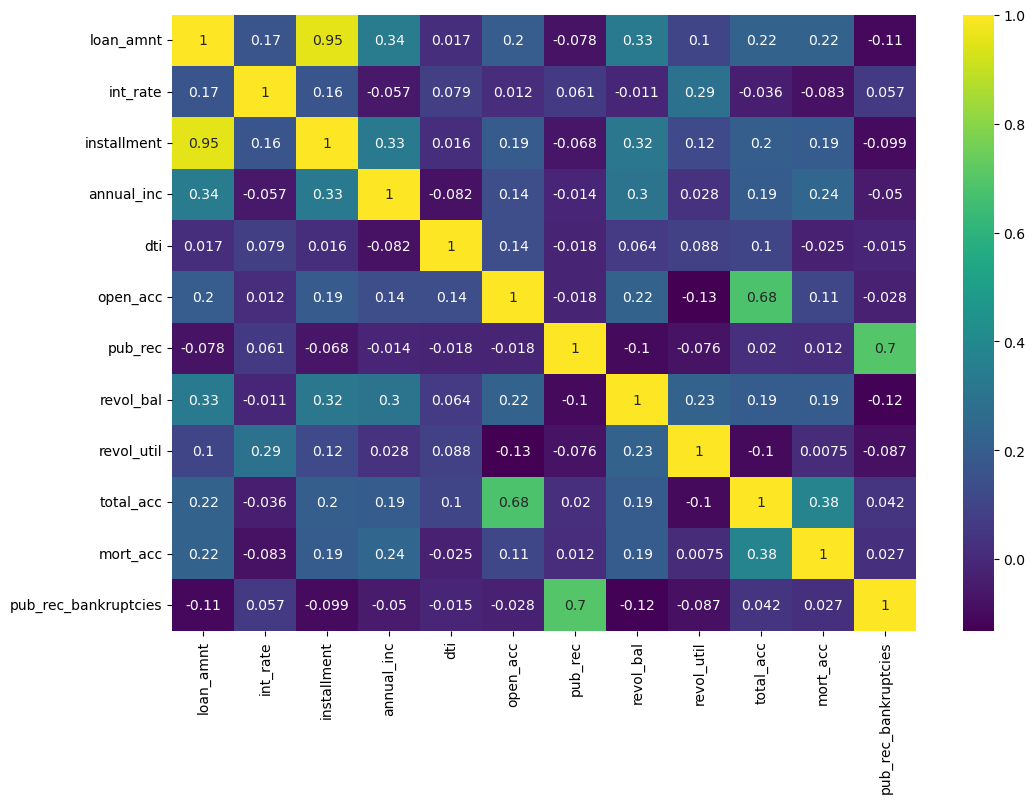

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='viridis')

### Đặc điểm
> Chỉ số tương quan giữa loan_amnt và installment tương đối cao (0.95)

## `loan_amnt` & `installment`

> - `installment`: Số tiền thanh toán hằng tháng
> - `loan_amnt`: Khoản vay

In [7]:
installment = data.hvplot.hist(
    y='installment', by='loan_status', subplots=False, 
    width=350, height=400, bins=50, alpha=0.4, 
    title="Installment theo Loan Status", 
    xlabel='Installment', ylabel='Counts', legend='top'
)

loan_amnt = data.hvplot.hist(
    y='loan_amnt', by='loan_status', subplots=False, 
    width=350, height=400, bins=30, alpha=0.4, 
    title="Loan Amount theo Loan Status", 
    xlabel='Loan Amount', ylabel='Counts', legend='top'
)

installment + loan_amnt

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [installment]   (installment_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [loan_amnt]   (loan_amnt_count)

In [8]:
loan_amnt_box = data.hvplot.box(
    y='loan_amnt', subplots=True, by='loan_status', width=300, height=350, 
    title="Loan Status theo Loan Amount ", xlabel='Loan Status', ylabel='Loan Amount'
)

installment_box = data.hvplot.box(
    y='installment', subplots=True, by='loan_status', width=300, height=350, 
    title="Loan Status theo Installment", xlabel='Loan Status', ylabel='Installment'
)

loan_amnt_box + installment_box

:Layout
   .BoxWhisker.I  :BoxWhisker   [loan_status]   (loan_amnt)
   .BoxWhisker.II :BoxWhisker   [loan_status]   (installment)

In [9]:
data.groupby(by='loan_status')['loan_amnt'].describe()

count     mean     std     min     25%      50%      75%  \
loan_status                                                                
Charged Off  77673.00 15126.30 8505.09 1000.00 8525.00 14000.00 20000.00   
Fully Paid  318357.00 13866.88 8302.32  500.00 7500.00 12000.00 19225.00   

                 max  
loan_status           
Charged Off 40000.00  
Fully Paid  40000.00

## `grade` & `sub_grade`

> - `grade` và 'sub_grade': Hai kiểu xếp hạng khoản vay


In [10]:
#Giá trị duy nhất trong grade và sub_grade
print(f"GRADE unique: {data.grade.unique()}")
print(f"SUB_GRADE unique: {data.sub_grade.unique()}")

GRADE unique: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
SUB_GRADE unique: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


In [11]:
fully_paid = data.loc[data['loan_status']=='Fully Paid', 'grade'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'grade'].value_counts().hvplot.bar() 

(fully_paid * charged_off).opts(
    title="Loan Status theo Grade", xlabel='Grades', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right', xrotation=90
)

:Overlay
   .Bars.Count.I  :Bars   [grade]   (count)
   .Bars.Count.II :Bars   [grade]   (count)

In [12]:
fully_paid = data.loc[data['loan_status']=='Fully Paid', 'sub_grade'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'sub_grade'].value_counts().hvplot.bar() 

(fully_paid * charged_off).opts(
    title="Loan Status theo Grade", xlabel='Grades', ylabel='Count',
    width=500, height=400, legend_cols=2, legend_position='top_right', xrotation=90
)

:Overlay
   .Bars.Count.I  :Bars   [sub_grade]   (count)
   .Bars.Count.II :Bars   [sub_grade]   (count)

In [13]:
# data.hvplot.bar()

C:\Users\taduc\AppData\Local\Temp\ipykernel_61852\121092049.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90);


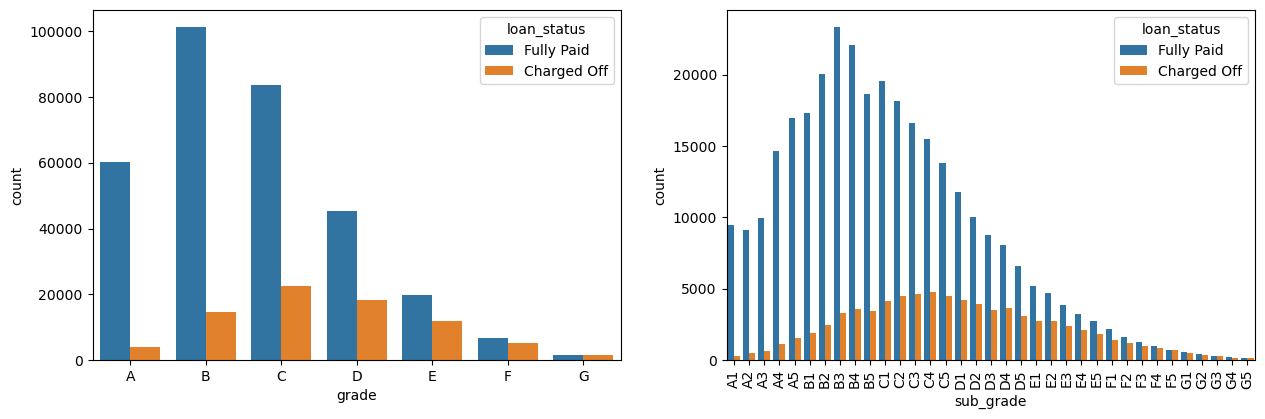

In [14]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(data.grade.unique().tolist())
sns.countplot(x='grade', data=data, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=data, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

 `F` and `G` không trả lãi thường xuyên.

<Axes: xlabel='sub_grade', ylabel='count'>

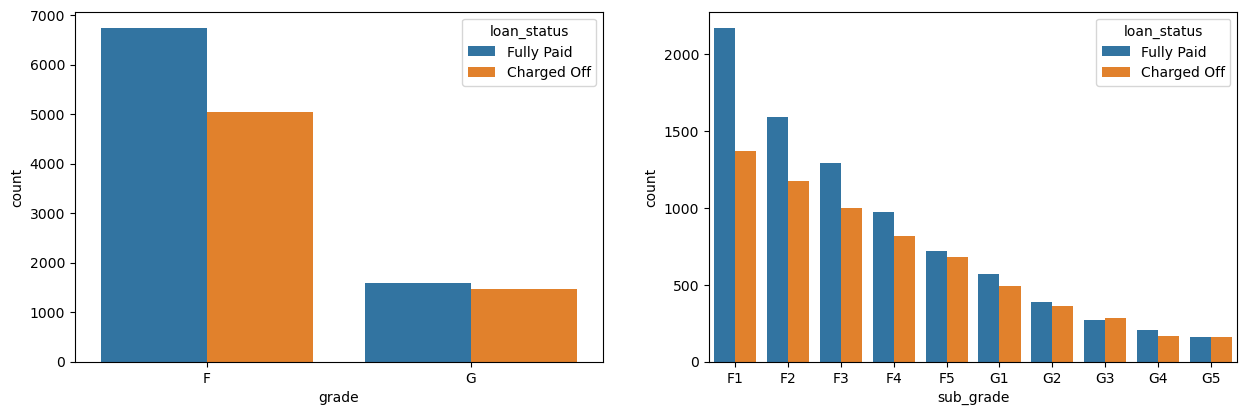

In [15]:
df = data[(data.grade == 'F') | (data.grade == 'G')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)

## `term`, `home_ownership`, `verification_status` & `purpose`

> - `term`: Số kỳ trả 
> - `home_ownership`: Tình trạng nhà ở của khách hàng: RENT, OWN, MORTGAGE, OTHER
> - `verification_status`: Thu nhập của khách hàng được xác nhận hay chưa: Verified, Not varified
> - `purpose`: Mục đích vay

In [16]:
data['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [17]:
fully_paid = data.loc[data['loan_status']=='Fully Paid', 'home_ownership'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'home_ownership'].value_counts().hvplot.bar()

home_ownership_count = (fully_paid * charged_off).opts(
    title="Loan Status phân theo Grade", xlabel='Home Ownership', ylabel='Count',
    width=350, height=350, legend_cols=2, legend_position='top_right'
).opts(xrotation=90)

home_ownership = data.home_ownership.value_counts().hvplot.bar(
    title="Loan Status phân theo Grade", xlabel='Home Ownership', ylabel='Count', 
    width=350, height=350, legend='top'
).opts(xrotation=90)

(home_ownership_count + home_ownership)

:Layout
   .Overlay.Count :Overlay
      .Bars.Count.I  :Bars   [home_ownership]   (count)
      .Bars.Count.II :Bars   [home_ownership]   (count)
   .Bars.Count    :Bars   [home_ownership]   (count)

In [18]:
data.loc[(data.home_ownership == 'ANY') | (data.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'  
data.home_ownership.value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

C:\Users\taduc\AppData\Local\Temp\ipykernel_61852\2424757870.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90);


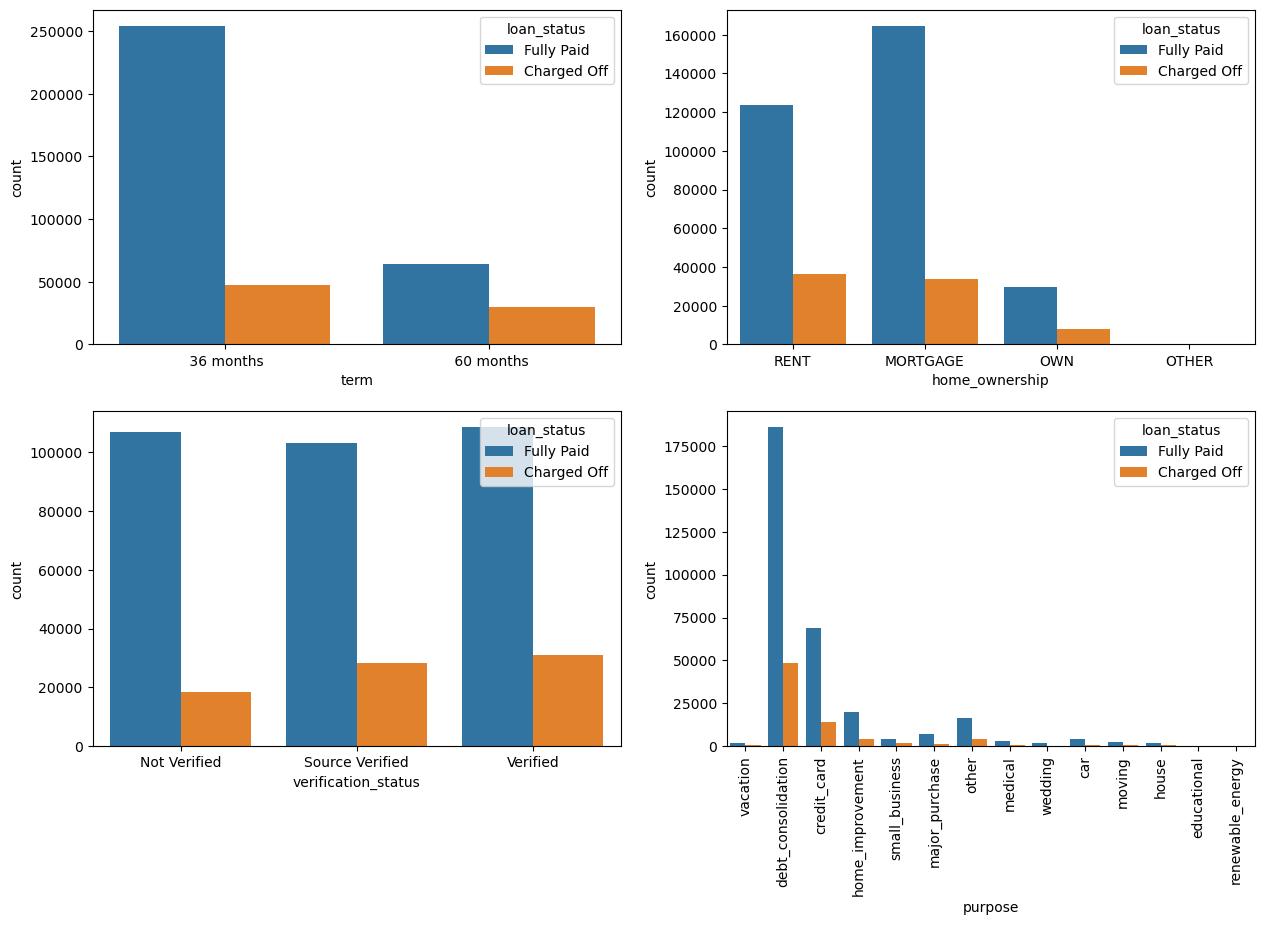

In [19]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=data, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=data, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=data, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=data, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [20]:
data.loc[data['home_ownership']=='OTHER', 'loan_status'].value_counts()

loan_status
Fully Paid     123
Charged Off     23
Name: count, dtype: int64

## `int_rate` & `annual_inc`

> - `int_rate`: Lãi suất
> - `annual_inc`: Thu nhập khai báo bởi khách hàng

In [21]:
int_rate = data.hvplot.hist(
    y='int_rate', by='loan_status', alpha=0.3, width=350, height=400,
    title="Loan Status theo Interest Rate", xlabel='Interest Rate', ylabel='Loans Counts', 
    legend='top'
)

annual_inc = data.hvplot.hist(
    y='annual_inc', by='loan_status', bins=50, alpha=0.3, width=350, height=400,
    title="Loan Status theo Annual Income", xlabel='Annual Income', ylabel='Loans Counts', 
    legend='top'
).opts(xrotation=45)

int_rate + annual_inc

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [int_rate]   (int_rate_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [annual_inc]   (annual_inc_count)

In [22]:
data[data.annual_inc <= 250000].hvplot.hist(
    y='annual_inc', by='loan_status', bins=50, alpha=0.3, width=500, height=400,
    title="Loan Status theo Annual Income (<= 250000/Year)", 
    xlabel='Annual Income', ylabel='Loans Counts', legend='top'
).opts(xrotation=45)

:NdOverlay   [loan_status]
   :Histogram   [annual_inc]   (annual_inc_count)

In [23]:
print((data[data.annual_inc >= 250000].shape[0] / data.shape[0]) * 100)
print((data[data.annual_inc >= 1000000].shape[0] / data.shape[0]) * 100)

1.0294674645860162
0.018937959245511705


In [24]:
data.loc[data.annual_inc >= 1000000, 'loan_status'].value_counts()

loan_status
Fully Paid     65
Charged Off    10
Name: count, dtype: int64

In [25]:
data.loc[data.annual_inc >= 250000, 'loan_status'].value_counts()

loan_status
Fully Paid     3509
Charged Off     568
Name: count, dtype: int64

- Khoản vay với lãi suất cao thường ít được trả lại.
- 75% khách hàng có thu nhập trên 1000000

## `emp_title` & `emp_length`

> - `emp_title`: Chức danh công việc khai báo bởi khách hàng.
> - `emp_length`: Thời gian làm việc.

In [26]:
print(data.emp_title.isna().sum())
print(data.emp_title.nunique())

22927
173105


In [27]:
data['emp_title'].value_counts()[:20]

emp_title
Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
Sales                       1638
Project Manager             1505
Owner                       1410
Driver                      1339
Office Manager              1218
manager                     1145
Director                    1089
General Manager             1074
Engineer                     995
teacher                      962
driver                       882
Vice President               857
Operations Manager           763
Administrative Assistant     756
Accountant                   748
Name: count, dtype: int64

C:\Users\taduc\AppData\Local\Temp\ipykernel_61852\3934631003.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90);


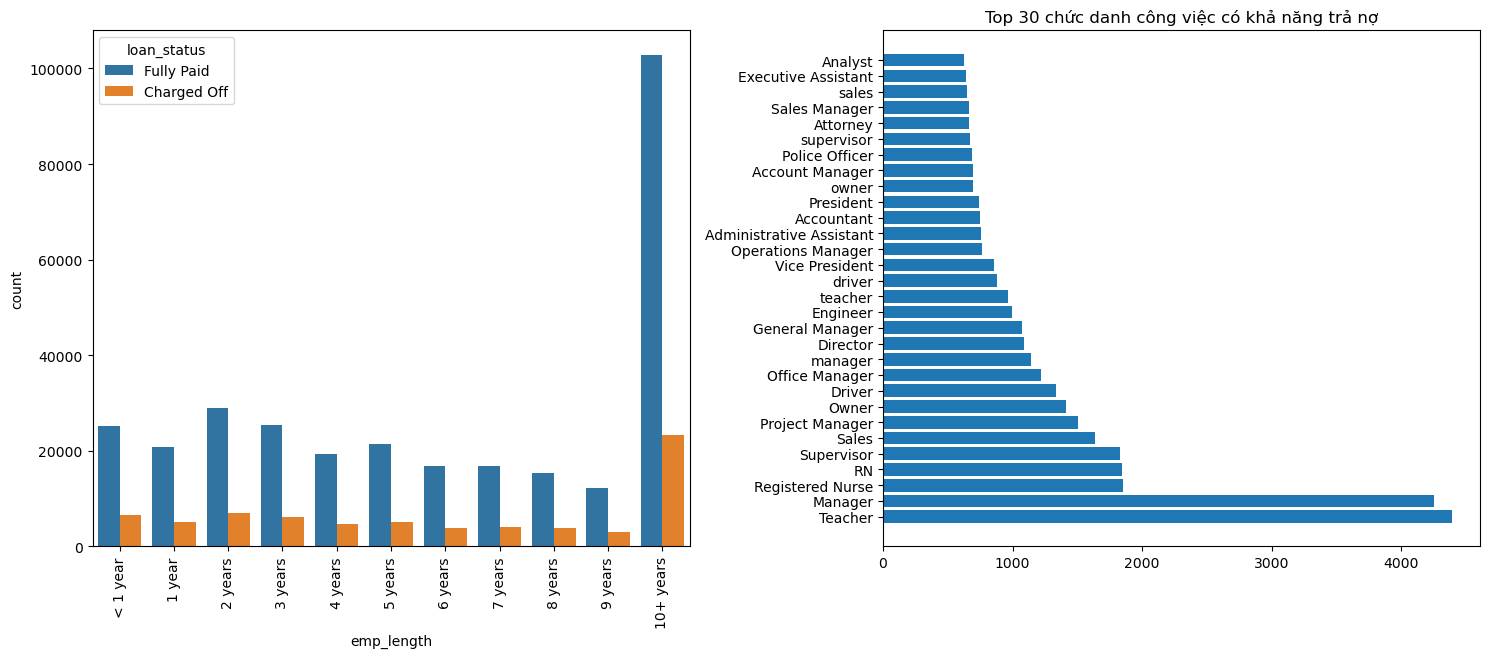

In [28]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=data, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(data.emp_title.value_counts()[:30].index, data.emp_title.value_counts()[:30])
plt.title("Top 30 chức danh công việc có khả năng trả nợ")
plt.tight_layout()

##  `issue_d`, `earliest_cr_line`

> - `issue_d`: Tháng mà khoản vay được giải ngân
> - `earliest_cr_line`: Thời điểm gần nhất của mức tín dụng của khách hàng

In [29]:
# data.hvplot.line(x='issue_d', y='loan_status')

In [30]:
data['earliest_cr_line'].value_counts()

earliest_cr_line
Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Jul-1958       1
Nov-1957       1
Jan-1953       1
Jul-1955       1
Aug-1959       1
Name: count, Length: 684, dtype: int64

In [31]:
data['issue_d'] = pd.to_datetime(data['issue_d'])
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])

C:\Users\taduc\AppData\Local\Temp\ipykernel_61852\836848778.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['issue_d'] = pd.to_datetime(data['issue_d'])
C:\Users\taduc\AppData\Local\Temp\ipykernel_61852\836848778.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])


In [32]:
fully_paid = data.loc[data['loan_status']=='Fully Paid', 'issue_d'].hvplot.hist(bins=35) 
charged_off = data.loc[data['loan_status']=='Charged Off', 'issue_d'].hvplot.hist(bins=35)

# fully_paid * charged_off
loan_issue_date = (fully_paid * charged_off).opts(
    title="Loan Status theo Loan Issue Date", xlabel='Loan Issue Date', ylabel='Count',
    width=350, height=350, legend_cols=2, legend_position='top_right'
).opts(xrotation=45)

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'earliest_cr_line'].hvplot.hist(bins=35) 
charged_off = data.loc[data['loan_status']=='Charged Off', 'earliest_cr_line'].hvplot.hist(bins=35)

earliest_cr_line = (fully_paid * charged_off).opts(
    title="Loan Status theo earliest_cr_line", xlabel='earliest_cr_line', ylabel='Count',
    width=350, height=350, legend_cols=2, legend_position='top_right'
).opts(xrotation=45)

loan_issue_date + earliest_cr_line

:Layout
   .Overlay.I  :Overlay
      .Histogram.I  :Histogram   [issue_d]   (issue_d_count)
      .Histogram.II :Histogram   [issue_d]   (issue_d_count)
   .Overlay.II :Overlay
      .Histogram.I  :Histogram   [earliest_cr_line]   (earliest_cr_line_count)
      .Histogram.II :Histogram   [earliest_cr_line]   (earliest_cr_line_count)

##  `title`

> - `title`: mục tiêu của khoản vay của khách àng

In [33]:
data.title.isna().sum()

1756

In [34]:
data['title'] = data.title.str.lower()

In [35]:
data.title.value_counts()[:10]

title
debt consolidation           168108
credit card refinancing       51781
home improvement              17117
other                         12993
consolidation                  5583
major purchase                 4998
debt consolidation loan        3513
business                       3017
medical expenses               2820
credit card consolidation      2638
Name: count, dtype: int64

Cột title được sinh ra từ purpose do đó cột title sẽ được loại bỏ

## `dti`, `open_acc`, `revol_bal`, `revol_util`, & `total_acc`

> - `dti`: Debt to income: Tỉ lệ khoản phải trả hàng tháng bao gồm tiền gốc và lãi trên thu nhập của người vay.
> - `open_acc`: Số lượng thẻ tín dụng còn hoạt động của khách hàng.
> - `revol_bal`: Số dư tín dụng tuần hoàn
> - `revol_util`: Tỷ lệ nợ tín dụng/ hạn mức tín dụng
> - `total_acc`: Số lượng thẻ tín dụng của khách hàng.

In [36]:
data.dti.value_counts()

dti
0.00     313
14.40    310
19.20    302
16.80    301
18.00    300
        ... 
59.18      1
48.37      1
45.71      1
42.38      1
55.53      1
Name: count, Length: 4262, dtype: int64

In [37]:
dti = data.hvplot.hist(
    y='dti', bins=50, width=350, height=350, 
    title="dti Distribution", xlabel='dti', ylabel='Count'
)

sub_dti = data[data['dti']<=50].hvplot.hist(
    y='dti', bins=50, width=350, height=350, 
    title="dti (<=30) Distribution", xlabel='dti', ylabel='Count', shared_axes=False
)

dti + sub_dti

:Layout
   .Histogram.I  :Histogram   [dti]   (dti_count)
   .Histogram.II :Histogram   [dti]   (dti_count)

In [38]:
print(data[data['dti']>=40].shape)

(296, 27)


In [39]:
data.loc[data['dti']>=50, 'loan_status'].value_counts()

loan_status
Fully Paid     26
Charged Off     9
Name: count, dtype: int64

In [40]:
dti = data[data['dti']<=50].hvplot.hist(
    y='dti', by='loan_status', bins=50, width=300, height=350, 
    title="dti (<=30) Distribution", xlabel='dti', ylabel='Count', 
    alpha=0.3, legend='top'
)

title="Loan Status theo The number of open credit lines"

open_acc = data.hvplot.hist(
    y='open_acc', by='loan_status', bins=50, width=300, height=350, 
    title=title, xlabel='The number of open credit lines', ylabel='Count', 
    alpha=0.4, legend='top'
)

title="Loan Status theo The total number of credit lines"

total_acc = data.hvplot.hist(
    y='total_acc', by='loan_status', bins=50, width=300, height=350, 
    title=title, xlabel='The total number of credit lines', ylabel='Count', 
    alpha=0.4, legend='top'
)

dti + open_acc + total_acc

:Layout
   .NdOverlay.I   :NdOverlay   [loan_status]
      :Histogram   [dti]   (dti_count)
   .NdOverlay.II  :NdOverlay   [loan_status]
      :Histogram   [open_acc]   (open_acc_count)
   .NdOverlay.III :NdOverlay   [loan_status]
      :Histogram   [total_acc]   (total_acc_count)

In [41]:
print(data.shape)
print(data[data.open_acc > 40].shape)

(396030, 27)
(217, 27)


In [42]:
print(data.shape)
print(data[data.total_acc > 80].shape)

(396030, 27)
(266, 27)


In [43]:
print(data.shape)
print(data[data.revol_util > 120].shape)

(396030, 27)
(27, 27)


In [44]:
title="Loan Status by Revolving line utilization rate"

revol_util = data.hvplot.hist(
    y='revol_util', by='loan_status', bins=50, width=350, height=400, 
    title=title, xlabel='Revolving line utilization rate', ylabel='Count', 
    alpha=0.4, legend='top'
)

title="Loan Status theo Revolving line utilization rate (<120)"

sub_revol_util = data[data.revol_util < 120].hvplot.hist(
    y='revol_util', by='loan_status', bins=50, width=350, height=400, 
    title=title, xlabel='Revolving line utilization rate', ylabel='Count', 
    shared_axes=False, alpha=0.4, legend='top'
)

revol_util + sub_revol_util

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [revol_util]   (revol_util_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [revol_util]   (revol_util_count)

In [45]:
data[data.revol_util > 200]

loan_amnt        term  int_rate  installment grade sub_grade  \
137211    3500.00   36 months     12.49       117.08     B        B4   

             emp_title emp_length home_ownership  annual_inc  \
137211  Budget Analyst  10+ years           RENT    45000.00   

       verification_status    issue_d loan_status             purpose  \
137211            Verified 2014-04-01  Fully Paid  debt_consolidation   

                     title   dti earliest_cr_line  open_acc  pub_rec  \
137211  debt consolidation 14.67       1998-10-01      2.00     0.00   

        revol_bal  revol_util  total_acc initial_list_status application_type  \
137211    2677.00      892.30       9.00                   f       INDIVIDUAL   

        mort_acc  pub_rec_bankruptcies  \
137211      0.00                  0.00   

                                             address  
137211  12506 Connie Burg\r\nVelasquezfort, TN 00813

In [46]:
print(data.shape)
print(data[data.revol_bal > 250000].shape)

(396030, 27)
(397, 27)


In [47]:
title = "Loan Status theo Total credit revolving balance"

revol_bal = data.hvplot.hist(
    y='revol_bal', by='loan_status', bins=50, width=350, height=400, 
    title=title, xlabel='Total credit revolving balance', ylabel='Count', 
    alpha=0.4, legend='top'
)

title = "Loan Status theo Total credit revolving balance (<250000)"

sub_revol_bal = data[data['revol_bal']<=250000].hvplot.hist(
    y='revol_bal', by='loan_status', bins=50, width=350, height=400, 
    title=title, xlabel='Total credit revolving balance', ylabel='Count', 
    alpha=0.4, legend='top', shared_axes=False
).opts(xrotation=45)

revol_bal + sub_revol_bal

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [revol_bal]   (revol_bal_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [revol_bal]   (revol_bal_count)

In [48]:
data.loc[data.revol_bal > 250000, 'loan_status'].value_counts()

loan_status
Fully Paid     351
Charged Off     46
Name: count, dtype: int64

- It seems that the smaller the `dti` the more likely that the loan will not be paid.
- Only `217` borrower have more than `40` open credit lines.
- Only `266` borrower have more than `80` credit line in the borrower credit file.

## ✔️ `pub_rec`, `initial_list_status`, `application_type`, `mort_acc`, & `pub_rec_bankruptcies`


In [49]:
xlabel = 'Number of derogatory public records'
title = "Loan Status theo Number of derogatory public records"

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'pub_rec'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'pub_rec'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Count',
    width=400, height=400, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [pub_rec]   (count)
   .Bars.Count.II :Bars   [pub_rec]   (count)

In [50]:
xlabel = "The initial listing status of the loan"
title = "Loan Status theo The initial listing status of the loan"

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'initial_list_status'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'initial_list_status'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Count',
    width=400, height=400, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [initial_list_status]   (count)
   .Bars.Count.II :Bars   [initial_list_status]   (count)

In [51]:
fully_paid = data.loc[data['loan_status']=='Fully Paid', 'application_type'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'application_type'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title="Loan Status theo Application Type", xlabel="Application Type", ylabel='Count',
    width=400, height=400, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [application_type]   (count)
   .Bars.Count.II :Bars   [application_type]   (count)

In [52]:
xlabel = "Number of public record bankruptcies"
title = "Loan Status theo The Number of public record bankruptcies"

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'pub_rec_bankruptcies'].value_counts().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'pub_rec_bankruptcies'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title=title, xlabel=xlabel, ylabel='Count',
    width=400, height=400, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [pub_rec_bankruptcies]   (count)
   .Bars.Count.II :Bars   [pub_rec_bankruptcies]   (count)

In [53]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [54]:
data['pub_rec'] = data.pub_rec.apply(pub_rec)
data['mort_acc'] = data.mort_acc.apply(mort_acc)
data['pub_rec_bankruptcies'] = data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

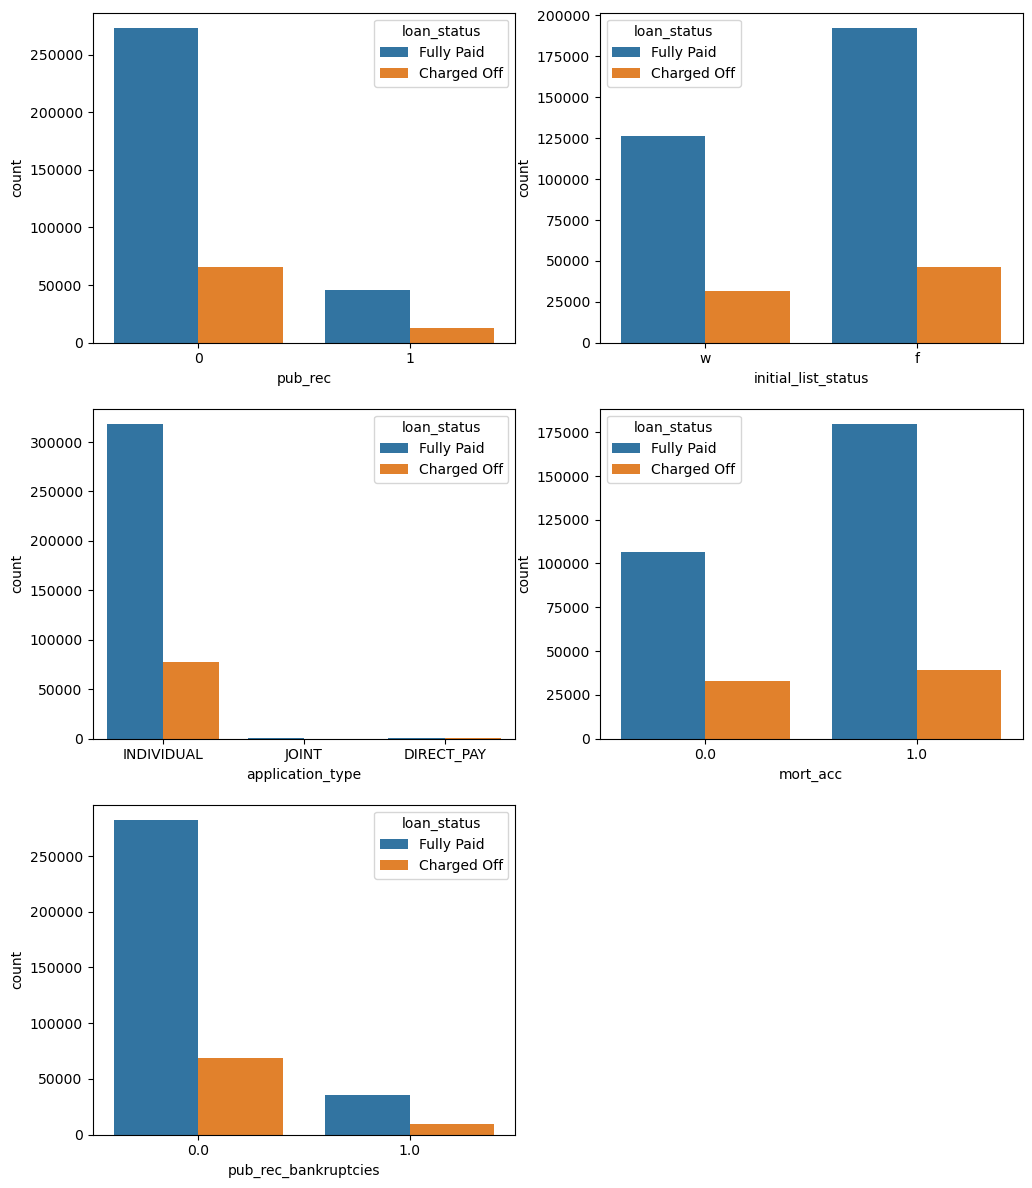

In [55]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=data, hue='loan_status')

plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=data, hue='loan_status')

plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=data, hue='loan_status')

plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=data, hue='loan_status')

plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=data, hue='loan_status')

## Tương quan giữa biến độc lập và biến phụ thuộc

In [56]:
data['loan_status'] = data.loan_status.map({'Fully Paid':1, 'Charged Off':0})

In [57]:
data.corr(numeric_only=True)['loan_status'].drop('loan_status').sort_values().hvplot.barh(
    width=600, height=400, 
    title="Tương quan giữa Loan status và Biến phụ thuộc", 
    ylabel='Correlation', xlabel='Numerical Features', 
)

:Bars   [index]   (loan_status)

****
## Kết luận:

Có 2 loại features chủ yếu: 
- 1. Features liên quan tới khách hàng (occupation, employment details,..), 
- 2. Features liên quan tới đặc điểm của khoản vay (amount of loan, interest rate, purpose of loan etc.) 
****

# Outliers Detection and Removing

In [58]:
## Loại bỏ giá trị ngoại lai

# 🔄 Tiền xử lý dữ liệu

**Mục đích:** 
> - Loại bỏ hoặc điền vào giá trị còn thiếu. 
> - Loại bỏ các feature không cần thiết.
> - Chuyển đổi biến phân loại về dạng số.

In [59]:
# Số hàng dữ liệu
print(f"Số hàng dữ liệu: {data.shape}")

Số hàng dữ liệu: (396030, 27)


In [60]:
# Tỷ lệ dữ liệu bị thiếu
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '22927' ==> '5.789%'
'emp_length': number of missing values '18301' ==> '4.621%'
'title': number of missing values '1756' ==> '0.443%'
'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


### `emp_title`

In [61]:
data.emp_title.nunique()

173105

Thực tế có nhiều job title khác nhau do đó không nên chuyển sang biến giả. Biến job title sẽ được loại bỏ.

In [62]:
data.drop('emp_title', axis=1, inplace=True)

### `emp_length`

In [63]:
data.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [64]:
for year in data.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{data[data.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')

10+ years years in this position:
loan_status
1   0.82
0   0.18
Name: proportion, dtype: float64
4 years years in this position:
loan_status
1   0.81
0   0.19
Name: proportion, dtype: float64
< 1 year years in this position:
loan_status
1   0.79
0   0.21
Name: proportion, dtype: float64
6 years years in this position:
loan_status
1   0.81
0   0.19
Name: proportion, dtype: float64
9 years years in this position:
loan_status
1   0.80
0   0.20
Name: proportion, dtype: float64
2 years years in this position:
loan_status
1   0.81
0   0.19
Name: proportion, dtype: float64
3 years years in this position:
loan_status
1   0.80
0   0.20
Name: proportion, dtype: float64
8 years years in this position:
loan_status
1   0.80
0   0.20
Name: proportion, dtype: float64
7 years years in this position:
loan_status
1   0.81
0   0.19
Name: proportion, dtype: float64
5 years years in this position:
loan_status
1   0.81
0   0.19
Name: proportion, dtype: float64
1 year years in this position:
loan_status
1   

In [65]:
data.drop('emp_length', axis=1, inplace=True)

### `title`

In [66]:
data.title.value_counts().head()

title
debt consolidation         168108
credit card refinancing     51781
home improvement            17117
other                       12993
consolidation                5583
Name: count, dtype: int64

In [67]:
data.purpose.value_counts().head()

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
Name: count, dtype: int64

Cột title column mô tả cho cột purpose. Do đó cột title sẽ bị xóa.

In [68]:
data.drop('title', axis=1, inplace=True)

### `mort_acc`
Xem sự tương quan giữa cột mort_acc với các feature khác. Dựa vào sự tương quan này để điền vào trường dữ liệu còn thiếu.

In [69]:
data.mort_acc.value_counts()

mort_acc
1.00    218458
0.00    139777
Name: count, dtype: int64

In [70]:
data.mort_acc.isna().sum()

37795

In [71]:
data.corr(numeric_only = True)['mort_acc'].drop('mort_acc').sort_values().hvplot.barh()

:Bars   [index]   (mort_acc)

Feature total_acc tương quan mạnh với the mort_acc. 
Nhóm bảng dữ liệu theo total_acc và tính trung bình cho mort_acc đối với mỗi giá trị của total_acc.

In [72]:
total_acc_avg = data.groupby(by='total_acc').mean(numeric_only=True).mort_acc

In [73]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [74]:
data['mort_acc'] = data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

### `revol_util` & `pub_rec_bankruptcies`
Hai feature trên có dữ liệu bị thiếu chiếm 0.5% tổng dữ liệu. Do đó dữ liệu bị thiếu sẽ được loại bỏ.


In [75]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'revol_util': number of missing values '276' ==> '0.070%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [76]:
data.dropna(inplace=True)

In [77]:
data.shape

(395219, 24)

## Biến phân loại và biến giả

In [78]:
print([column for column in data.columns if data[column].dtype == object])

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'address']


### `term`

In [79]:
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [80]:
term_values = {' 36 months': 36, ' 60 months': 60}
data['term'] = data.term.map(term_values)

In [81]:
data.term.unique()

array([36, 60], dtype=int64)

### `grade` & `sub_grade`

Drop grade do sub_grade đã bao hàm grade

In [82]:
data.drop('grade', axis=1, inplace=True)

In [83]:
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership']
data = pd.get_dummies(data, columns=dummies, drop_first=True)

### `address`
Tạo biến phái sinh zip_code từ địa chỉ trong dữ liệu.

In [84]:
data.address.head()

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [85]:
data['zip_code'] = data.address.apply(lambda x: x[-5:])

In [86]:
data.zip_code.value_counts()

zip_code
70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: count, dtype: int64

In [87]:
data = pd.get_dummies(data, columns=['zip_code'], drop_first=True)

In [88]:
data.drop('address', axis=1, inplace=True)

### `issue_d` 
Ngày giải ngân có thể làm cho mô hình học thuộc feature này và dự đoán biến phụ thuộc -> không thể được biết trước khi áp dụng model -> loại bỏ feature issue_d

In [89]:
data.drop('issue_d', axis=1, inplace=True)

### `earliest_cr_line`

In [90]:
data['earliest_cr_line'] = data.earliest_cr_line.dt.year

In [91]:
data.earliest_cr_line.nunique()

65

In [92]:
data.earliest_cr_line.value_counts()

earliest_cr_line
2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: count, Length: 65, dtype: int64

In [93]:
data.head()

loan_amnt  term  int_rate  installment  annual_inc  loan_status   dti  \
0   10000.00    36     11.44       329.48   117000.00            1 26.24   
1    8000.00    36     11.99       265.68    65000.00            1 22.05   
2   15600.00    36     10.49       506.97    43057.00            1 12.79   
3    7200.00    36      6.49       220.65    54000.00            1  2.60   
4   24375.00    60     17.27       609.33    55000.00            0 33.95   

   earliest_cr_line  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0              1990     16.00        0   36369.00       41.80      25.00   
1              2004     17.00        0   20131.00       53.30      27.00   
2              2007     13.00        0   11987.00       92.20      26.00   
3              2006      6.00        0    5472.00       21.50      13.00   
4              1999     13.00        0   24584.00       69.80      43.00   

   mort_acc  pub_rec_bankruptcies  sub_grade_A2  sub_grade_A3  sub_grade_A4  \
0      0.00                  0.00         False         False         False   
1      1.00                  0.00         False         False         False   
2      0.00                  0.00         False         False         False   
3      0.00                  0.00          True         False         False   
4      1.00                  0.00         False         False         False   

   sub_grade_A5  sub_grade_B1  sub_grade_B2  sub_grade_B3  sub_grade_B4  \
0         False         False         False         False          True   
1         False         False         False         False         False   
2         False         False         False          True         False   
3         False         False         False         False         False   
4         False         False         False         False         False   

   sub_grade_B5  sub_grade_C1  ...  purpose_home_improvement  purpose_house  \
0         False         False  ...                     False          False   
1          True         False  ...                     False          False   
2         False         False  ...                     False          False   
3         False         False  ...                     False          False   
4         False         False  ...                     False          False   

   purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  \
0                   False            False           False          False   
1                   False            False           False          False   
2                   False            False           False          False   
3                   False            False           False          False   
4                   False            False           False          False   

   purpose_renewable_energy  purpose_small_business  purpose_vacation  \
0                     False                   False              True   
1                     False                   False             False   
2                     False                   False             False   
3                     False                   False             False   
4                     False                   False             False   

   purpose_wedding  initial_list_status_w  application_type_INDIVIDUAL  \
0            False                   True                         True   
1            False                  False                         True   
2            False                  False                         True   
3            False                  False                         True   
4            False                  False                         True   

   application_type_JOINT  home_ownership_OTHER  home_ownership_OWN  \
0                   False                 False               False   
1                   False                 False               False   
2                   False                 False               False   
3                   False                 False          

# Kiểm tra data bị trùng lặp

In [94]:
print(f"Data shape: {data.shape}")

# Xóa bỏ hàng trùng lặp
data.drop_duplicates(inplace=True)
print(f"Data shape: {data.shape}")

Data shape: (395219, 79)
Data shape: (395219, 79)


## Train Test Split

In [95]:
w_p = data.loan_status.value_counts()[0] / data.shape[0]
w_n = data.loan_status.value_counts()[1] / data.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

Weight of positive values 0.19615200686201828
Weight of negative values 0.8038479931379817


In [96]:
train, test = train_test_split(data, test_size=0.33, random_state=42)

print(train.shape)
print(test.shape)

(264796, 79)
(130423, 79)


# Loại bỏ giá trị ngoại lai

In [97]:
print(train[train['dti'] <= 50].shape)
print(train.shape)

(264776, 79)
(264796, 79)


In [98]:
print(train.shape)
train = train[train['annual_inc'] <= 250000]
train = train[train['dti'] <= 50]
train = train[train['open_acc'] <= 40]
train = train[train['total_acc'] <= 80]
train = train[train['revol_util'] <= 120]
train = train[train['revol_bal'] <= 250000]
print(train.shape)

(264796, 79)
(262143, 79)


In [99]:
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

In [100]:
X_train.dtypes

loan_amnt         float64
term                int64
int_rate          float64
installment       float64
annual_inc        float64
                   ...   
zip_code_30723       bool
zip_code_48052       bool
zip_code_70466       bool
zip_code_86630       bool
zip_code_93700       bool
Length: 78, dtype: object

In [101]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Xây dựng mô hình

In [102]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [103]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

# Artificial Neural Networks (ANNs)

In [104]:
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();

def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)
  
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

In [105]:
num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3


model = nn_model(
    num_columns=num_columns, 
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
8192/8192 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - AUC: 0.8408 - loss: 0.3327 - val_AUC: 0.8971 - val_loss: 0.2696
Epoch 2/20
8192/8192 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - AUC: 0.8759 - loss: 0.2924 - val_AUC: 0.9037 - val_loss: 0.2621
Epoch 3/20
8192/8192 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - AUC: 0.8804 - loss: 0.2880 - val_AUC: 0.9050 - val_loss: 0.2590
Epoch 4/20
8192/8192 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - AUC: 0.8861 - loss: 0.2817 - val_AUC: 0.9051 - val_loss: 0.2603
Epoch 5/20
8192/8192 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - AUC: 0.8869 - loss: 0.2808 - val_AUC: 0.9054 - val_loss: 0.2584
Epoch 6/20
8192/8192 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - AUC: 0.8884 - loss: 0.2792 - val_AUC: 0.9052 - val_loss: 0.2635
Epoch 7/20
8192/8192 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - AUC: 0.8894 - loss: 0.2788 - val_AUC: 0.9056 - val_loss: 0.2586
Epoch 8/20
8192/8192 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - AUC: 0.8892 - loss: 0.2779 - val_AUC: 0.9062 - val_loss: 0.2588
Epoch 9/20
8192/8192 ━━━━━━━━━━━

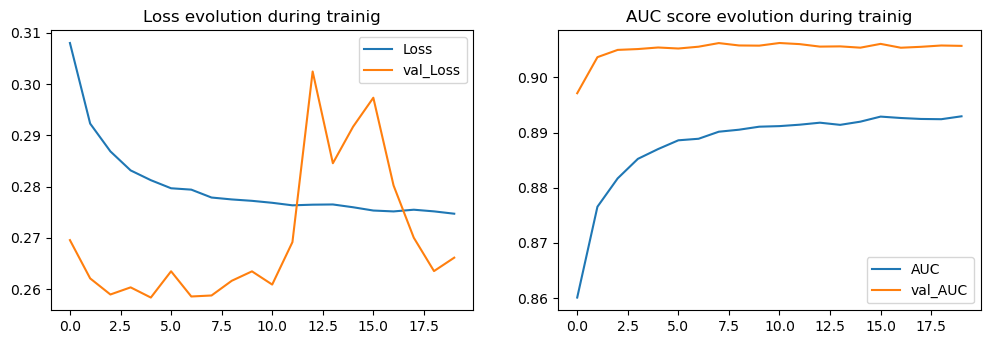

In [106]:
plot_learning_evolution(r)

In [107]:
y_train_pred = model.predict(X_train)
evaluate_nn(y_train, y_train_pred.round(), train=True)

8192/8192 ━━━━━━━━━━━━━━━━━━━━ 7s 792us/step
Train Result:
Accuracy Score: 88.85%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.92      0.88      0.89       0.90          0.89
recall        0.48      0.99      0.89       0.73          0.89
f1-score      0.63      0.93      0.89       0.78          0.87
support   51665.00 210478.00      0.89  262143.00     262143.00
_______________________________________________
Confusion Matrix: 
 [[ 24588  27077]
 [  2144 208334]]



In [108]:
y_test_pred = model.predict(X_test)
evaluate_nn(y_test, y_test_pred.round(), train=False)

4076/4076 ━━━━━━━━━━━━━━━━━━━━ 3s 778us/step
Test Result:
Accuracy Score: 88.87%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.91      0.89      0.89       0.90          0.89
recall        0.48      0.99      0.89       0.73          0.89
f1-score      0.63      0.93      0.89       0.78          0.87
support   25480.00 104943.00      0.89  130423.00     130423.00
_______________________________________________
Confusion Matrix: 
 [[ 12124  13356]
 [  1159 103784]]



In [109]:
scores_dict = {
    'ANNs': {
        'Train': roc_auc_score(y_train, model.predict(X_train)),
        'Test': roc_auc_score(y_test, model.predict(X_test)),
    },
}

8192/8192 ━━━━━━━━━━━━━━━━━━━━ 6s 759us/step
4076/4076 ━━━━━━━━━━━━━━━━━━━━ 3s 748us/step


# XGBoost Classifier

In [110]:

xgb_clf = XGBClassifier(use_label_encoder=False)

xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 89.60%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.94      0.89      0.90       0.92          0.90
recall        0.50      0.99      0.90       0.75          0.90
f1-score      0.66      0.94      0.90       0.80          0.88
support   51665.00 210478.00      0.90  262143.00     262143.00
_______________________________________________
Confusion Matrix: 
 [[ 26027  25638]
 [  1627 208851]]

Test Result:
Accuracy Score: 88.85%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.90      0.89      0.89       0.89          0.89
recall        0.48      0.99      0.89       0.73          0.89
f1-score      0.63      0.93      0.89       0.78          0.87
support   25480.00 104943.00      0.89  130423.00     130423.00
_________________________________________

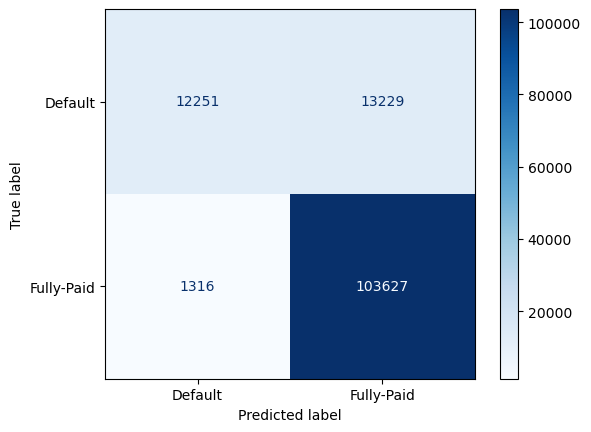

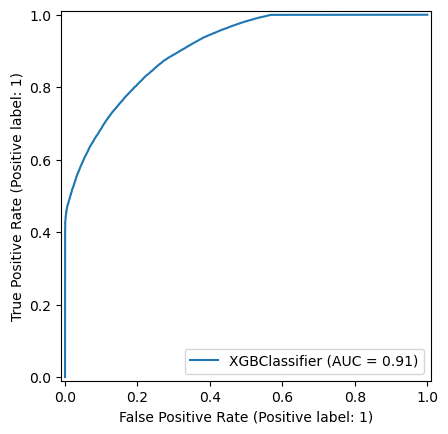

In [111]:
disp = ConfusionMatrixDisplay.from_estimator(
    xgb_clf, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Default', 'Fully-Paid']
)

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)

In [112]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

# Random Forest Classifier

In [113]:
rf_clf = RandomForestClassifier(n_estimators=100)

rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     1.00      1.00      1.00       1.00          1.00
recall        1.00      1.00      1.00       1.00          1.00
f1-score      1.00      1.00      1.00       1.00          1.00
support   51665.00 210478.00      1.00  262143.00     262143.00
_______________________________________________
Confusion Matrix: 
 [[ 51664      1]
 [     0 210478]]

Test Result:
Accuracy Score: 88.94%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.96      0.88      0.89       0.92          0.90
recall        0.45      0.99      0.89       0.72          0.89
f1-score      0.62      0.94      0.89       0.78          0.87
support   25480.00 104943.00      0.89  130423.00     130423.00
________________________________________

In [114]:
rf_clf = RandomForestClassifier(n_estimators=100)

rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     1.00      1.00      1.00       1.00          1.00
recall        1.00      1.00      1.00       1.00          1.00
f1-score      1.00      1.00      1.00       1.00          1.00
support   51665.00 210478.00      1.00  262143.00     262143.00
_______________________________________________
Confusion Matrix: 
 [[ 51665      0]
 [     0 210478]]

Test Result:
Accuracy Score: 88.92%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.95      0.88      0.89       0.92          0.90
recall        0.45      0.99      0.89       0.72          0.89
f1-score      0.62      0.94      0.89       0.78          0.87
support   25480.00 104943.00      0.89  130423.00     130423.00
________________________________________

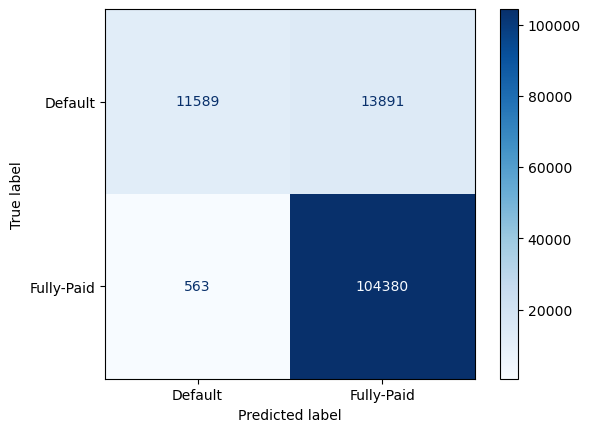

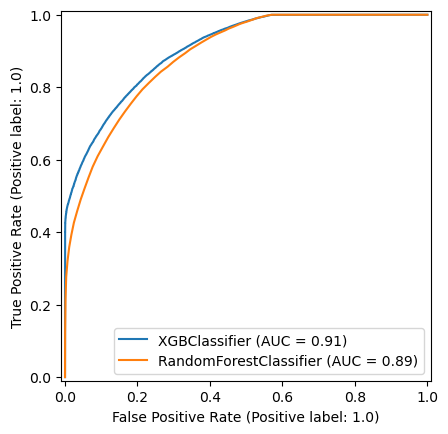

In [115]:
disp = ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Default', 'Fully-Paid'])

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, ax=disp.ax_)

In [116]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

# So sánh performance của các model

In [117]:
ml_models = {
    'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
    'ANNs': model
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.725
XGBOOST                        roc_auc_score: 0.734
4076/4076 ━━━━━━━━━━━━━━━━━━━━ 3s 704us/step
ANNS                           roc_auc_score: 0.906


In [118]:
scores_df = pd.DataFrame(scores_dict)
scores_df.hvplot.barh(
    width=500, height=400, 
    title="ROC Scores of ML Models", xlabel="ROC Scores", 
    alpha=0.4, legend='top'
)

:Bars   [index,Variable]   (value)